In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-06-08 03:32:50--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-08 03:32:50 (58.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2024-06-08 03:32:56--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.207, 64.233.181.207, 173.194.206.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.008s  

2024-06-08 03:32:57 (73.6 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
import pandas as pd
train_df=pd.read_csv("/content/train.csv")
test_df=pd.read_csv("/content/test.csv")
train_df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
import random
random_index=random.randint(0,len(train_df)-5)
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
   _,text,target=row
   print(f"target:{target}","real disaster" if target > 0 else "not actual disaster")
   print(f"text\n{text}\n")
   print("----")

target:1 real disaster
text
So you have a new weapon that can cause un-imaginable destruction.

----
target:0 not actual disaster
text
The f$&amp;@ing things I do for #GISHWHES Just got soaked in a deluge going for pads and tampons. Thx @mishacollins @/@

----
target:1 real disaster
text
DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe CoL police can catch a pickpocket in Liverpool Stree... http://t.co/vXIn1gOq4Q

----
target:0 not actual disaster
text
Aftershock back to school kick off was great. I want to thank everyone for making it possible. What a great night.

----
target:0 not actual disaster
text
in response to trauma Children of Addicts develop a defensive self - one that decreases vulnerability. (3

----


In [ ]:

from sklearn.model_selection import train_test_split
train_sentences,val_sentences,train_labels,val_labels=train_test_split(train_df_shuffled["text"].to_numpy(),train_df_shuffled["target"].to_numpy(),test_size=0.1,random_state=42)

In [ ]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)
train_sentences[:10],val_sentences[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array(['D

Tokenization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization



text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None)
                                    #

In [ ]:
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
max_vocab_length=1000
max_length=15
text_vectorizer=TextVectorization(max_tokens=max_vocab_length,
                                  output_mode='int',
                                  output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 1000
Top 5 most common words: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 least common words: ['reported', 'r', 'pray', 'playlist', 'patience']


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding=layers.Embedding(input_dim=max_vocab_length,
                           output_dim=128,
                           embeddings_initializer="uniform",
                           input_length=max_length,
                           name='embedding1')
embedding

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
      \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
@APPLEOFFIClAL Migrating from iPhoto to Photo is a catastrophe. I have wasted days trying to get this to work. 12 hrsto get to 8% complete.      

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-3.46634537e-03, -2.58539319e-02, -4.08326760e-02, ...,
          4.42180522e-02, -3.34425345e-02,  1.34178735e-02],
        [-3.46634537e-03, -2.58539319e-02, -4.08326760e-02, ...,
          4.42180522e-02, -3.34425345e-02,  1.34178735e-02],
        [-1.16875879e-02,  2.30297446e-05, -3.76327150e-02, ...,
         -2.88482197e-02, -1.65055022e-02, -2.77583245e-02],
        ...,
        [ 4.46064733e-02,  4.42534685e-03, -1.63439661e-03, ...,
         -2.58224253e-02,  4.75107506e-03,  8.09568167e-03],
        [ 3.20812128e-02, -5.49049303e-03,  2.53202431e-02, ...,
         -1.13858357e-02,  2.67584249e-03, -1.49205551e-02],
        [-1.81166157e-02,  1.66186802e-02, -7.63989612e-03, ...,
          4.89781238e-02, -3.27752121e-02,  3.93048413e-02]]],
      dtype=float32)>

Model 0: Naive Bayes (baseline)
Model 1: Feed-forward neural network (dense model)
Model 2: LSTM model
Model 3: GRU model
Model 4: Bidirectional-LSTM model
Model 5: 1D Convolutional Neural Network
Model 6: TensorFlow Hub Pretrained Feature Extractor
Model 7: Same as model 6 with 10% of training data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true,y_pred):
  model_accuracy=accuracy_score(y_true,y_pred)*100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [ ]:
baseline_results=calculate_results(y_true=val_labels,y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
from tensorflow.keras import layers
inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")





In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="simple_dense_model")])

Saving TensorBoard log files to: model_logs/simple_dense_model/20240608-044013
Epoch 1/5
215/215 [==============================] - 4s 12ms/step - loss: 0.6190 - accuracy: 0.6703 - val_loss: 0.5599 - val_accuracy: 0.7336
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.4918 - accuracy: 0.7827 - val_loss: 0.5002 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 1s 7ms/step - loss: 0.4367 - accuracy: 0.8059 - val_loss: 0.4863 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4112 - accuracy: 0.8186 - val_loss: 0.4855 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3944 - accuracy: 0.8248 - val_loss: 0.4887 - val_accuracy: 0.7808


In [ ]:
model_1_pred_probs=model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.5395879 ],
       [0.6905801 ],
       [0.9698569 ],
       [0.10663832],
       [0.15396985],
       [0.9255902 ],
       [0.8598675 ],
       [0.8299601 ],
       [0.7127077 ],
       [0.16653676]], dtype=float32)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [ ]:
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.08398950131233,
 'precision': 0.7856875884556138,
 'recall': 0.7808398950131233,
 'f1': 0.777681907957685}

In [ ]:
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.08, Difference: -1.18
Baseline precision: 0.81, New precision: 0.79, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01


model 2


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_2")


inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)

x = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

(None, 15, 128)
(None, 64)


In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "LSTM")])

Saving TensorBoard log files to: model_logs/LSTM/20240608-055538
Epoch 1/5
215/215 [==============================] - 9s 19ms/step - loss: 0.5257 - accuracy: 0.7393 - val_loss: 0.4898 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 5s 23ms/step - loss: 0.4212 - accuracy: 0.8152 - val_loss: 0.4757 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3934 - accuracy: 0.8283 - val_loss: 0.5014 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3720 - accuracy: 0.8405 - val_loss: 0.5142 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.3481 - accuracy: 0.8520 - val_loss: 0.5203 - val_accuracy: 0.7703


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


((762, 1),
 array([[0.48834735],
        [0.6561581 ],
        [0.96576375],
        [0.08688834],
        [0.11134798],
        [0.98788697],
        [0.8210611 ],
        [0.92764896],
        [0.8222015 ],
        [0.11932439]], dtype=float32))

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.03412073490814,
 'precision': 0.7726339681635592,
 'recall': 0.7703412073490814,
 'f1': 0.7679241301282296}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_2_results)

Baseline accuracy: 79.27, New accuracy: 77.03, Difference: -2.23
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.02
Baseline f1: 0.79, New f1: 0.77, Difference: -0.02


model 3


In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_3")

# Build an RNN using the GRU cell
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
# x = layers.GRU(64, return_sequences=True) # stacking recurrent cells requires return_sequences=True
x = layers.GRU(64)(x)
# x = layers.Dense(64, activation="relu")(x) # optional dense layer after GRU cell
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "GRU")])

Saving TensorBoard log files to: model_logs/GRU/20240608-055938
Epoch 1/5
215/215 [==============================] - 7s 34ms/step - loss: 0.3229 - accuracy: 0.8663 - val_loss: 0.5451 - val_accuracy: 0.7546
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.3023 - accuracy: 0.8736 - val_loss: 0.5477 - val_accuracy: 0.7598
Epoch 3/5
215/215 [==============================] - 7s 32ms/step - loss: 0.2793 - accuracy: 0.8853 - val_loss: 0.6285 - val_accuracy: 0.7454
Epoch 4/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2609 - accuracy: 0.8942 - val_loss: 0.6436 - val_accuracy: 0.7375
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2390 - accuracy: 0.9025 - val_loss: 0.7139 - val_accuracy: 0.7428


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10]

24/24 [==============================] - 0s 5ms/step


((762, 1),
 array([[0.97929966],
        [0.67693025],
        [0.99033487],
        [0.05459167],
        [0.00745128],
        [0.9986551 ],
        [0.90141624],
        [0.9933503 ],
        [0.9007114 ],
        [0.40053037]], dtype=float32))

In [ ]:
# Calcuate model_3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 76.64041994750657,
 'precision': 0.7674517658976838,
 'recall': 0.7664041994750657,
 'f1': 0.7645419362124183}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_3_results)

Baseline accuracy: 79.27, New accuracy: 76.64, Difference: -2.62
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline recall: 0.79, New recall: 0.77, Difference: -0.03
Baseline f1: 0.79, New f1: 0.76, Difference: -0.02


In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # load Universal Sentence Encoder
embed_samples = embed([sample_sentence,
                      "When you call the universal sentence encoder on a sentence, it turns it into numbers."])

print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
sentence_encode_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype='string',
                                        trainable=False,
                                        name='USE')

In [ ]:
model_4=tf.keras.Sequential([
    sentence_encode_layer,
    layers.Dense(64,activation='relu'),
    layers.Dense(1,activation='sigmoid')
],name='model_4_USE')
model_4.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),
metrics=['Accuracy'])

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])


Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240608-061757
Epoch 1/5
215/215 [==============================] - 9s 16ms/step - loss: 0.5042 - Accuracy: 0.7865 - val_loss: 0.4454 - val_Accuracy: 0.8018
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.4143 - Accuracy: 0.8148 - val_loss: 0.4336 - val_Accuracy: 0.8163
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3994 - Accuracy: 0.8231 - val_loss: 0.4296 - val_Accuracy: 0.8150
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3920 - Accuracy: 0.8264 - val_loss: 0.4257 - val_Accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3856 - Accuracy: 0.8292 - val_loss: 0.4274 - val_Accuracy: 0.8163


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 19ms/step


array([[0.15504567],
       [0.75004834],
       [0.990213  ],
       [0.19983818],
       [0.7049069 ],
       [0.68775886],
       [0.98101485],
       [0.97928154],
       [0.931482  ],
       [0.08484747]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'accuracy': 81.62729658792651,
 'precision': 0.8187546712946793,
 'recall': 0.8162729658792651,
 'f1': 0.8147089025083661}

In [ ]:
compare_baseline_to_new_results(baseline_results, model_4_results)

Baseline accuracy: 79.27, New accuracy: 81.63, Difference: 2.36
Baseline precision: 0.81, New precision: 0.82, Difference: 0.01
Baseline recall: 0.79, New recall: 0.82, Difference: 0.02
Baseline f1: 0.79, New f1: 0.81, Difference: 0.03


model5

In [ ]:
import numpy as np

train_sentences_90_percent, train_sentences_10_percent, train_labels_90_percent, train_labels_10_percent = train_test_split(np.array(train_sentences),
                                                                                                                            train_labels,
                                                                                                                            test_size=0.1,
                                                                                                                            random_state=42)

In [ ]:
model_5 = tf.keras.models.clone_model(model_4)

# Compile model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary (will be same as model_4)
model_5.summary()

Model: "model_4_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_5_history = model_5.fit(x=train_sentences_10_percent,
                              y=train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR, "10_percent_tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/10_percent_tf_hub_sentence_encoder/20240608-062344
Epoch 1/5
22/22 [==============================] - 9s 76ms/step - loss: 0.6704 - accuracy: 0.6676 - val_loss: 0.6507 - val_accuracy: 0.6864
Epoch 2/5
22/22 [==============================] - 1s 24ms/step - loss: 0.5989 - accuracy: 0.8047 - val_loss: 0.5950 - val_accuracy: 0.7375
Epoch 3/5
22/22 [==============================] - 1s 28ms/step - loss: 0.5230 - accuracy: 0.8207 - val_loss: 0.5425 - val_accuracy: 0.7651
Epoch 4/5
22/22 [==============================] - 1s 28ms/step - loss: 0.4578 - accuracy: 0.8324 - val_loss: 0.5087 - val_accuracy: 0.7717
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4132 - accuracy: 0.8426 - val_loss: 0.4903 - val_accuracy: 0.7795


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 2s 16ms/step


array([[0.24232845],
       [0.78053826],
       [0.88258994],
       [0.31444255],
       [0.55632806],
       [0.8185039 ],
       [0.79202956],
       [0.83663535],
       [0.82305396],
       [0.13097134]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'accuracy': 77.95275590551181,
 'precision': 0.7849754984084437,
 'recall': 0.7795275590551181,
 'f1': 0.7761172470890804}

In [ ]:
# Compare to baseline
compare_baseline_to_new_results(baseline_results, model_5_results)

Baseline accuracy: 79.27, New accuracy: 77.95, Difference: -1.31
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline recall: 0.79, New recall: 0.78, Difference: -0.01
Baseline f1: 0.79, New f1: 0.78, Difference: -0.01



Comparing the performance of each of our models


In [ ]:
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "tf_hub_sentence_encoder": model_4_results,
                                  "tf_hub_10_percent_data": model_5_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
baseline,79.265092,0.811139,0.792651,0.786219
simple_dense,78.083990,0.785688,0.780840,0.777682
lstm,77.034121,0.772634,0.770341,0.767924
tf_hub_sentence_encoder,81.627297,0.818755,0.816273,0.814709
tf_hub_10_percent_data,77.952756,0.784975,0.779528,0.776117


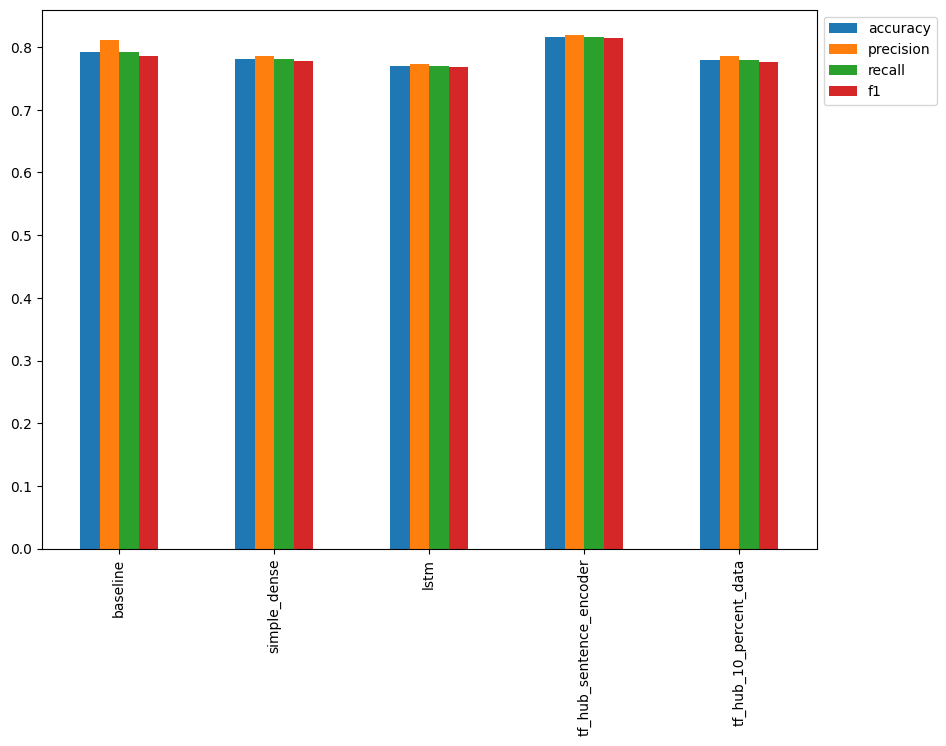

In [ ]:
# Reduce the accuracy to same scale as other metrics
all_model_results["accuracy"] = all_model_results["accuracy"]/100
# Plot and compare all of the model results
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

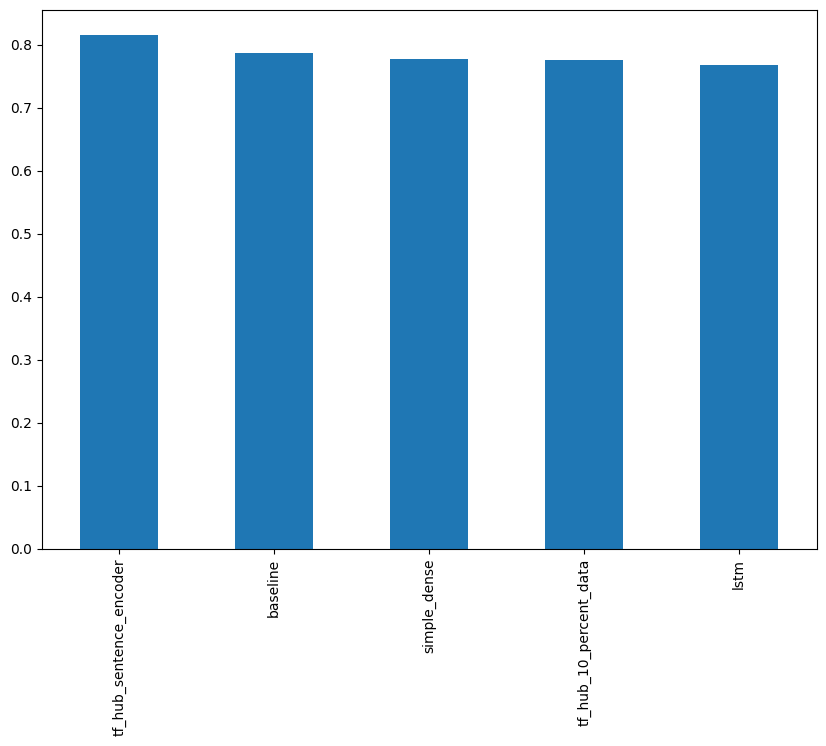

In [ ]:
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

saving the project

In [ ]:
model_4.save("model_4.h5")
loaded_model_4 = tf.keras.models.load_model("model_4.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})
# How does our loaded model perform?
loaded_model_4.evaluate(val_sentences, val_labels)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 8s 41ms/step - loss: 0.4274 - Accuracy: 0.8163


[0.4274458587169647, 0.8162729740142822]

In [ ]:
model_4.save("model_4_SavedModel_format")

In [ ]:
# Load TF Hub Sentence Encoder SavedModel
loaded_model_4_SavedModel = tf.keras.models.load_model("model_4_SavedModel_format")
# Evaluate loaded SavedModel format
loaded_model_4_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4274 - Accuracy: 0.8163


[0.4274458587169647, 0.8162729740142822]

prediction in the dataser

In [ ]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_4.predict([test_sample])) # has to be list
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("----\n")

1/1 [==============================] - 0s 129ms/step
Pred: 0, Prob: 0.434948593378067
Text:
@Statoilasa &amp; @TOTAL make significant discovery in the North Sea: Visualise the full potential on our seismic     #g http://t.co/ve2eBqm21B

----

1/1 [==============================] - 0s 99ms/step
Pred: 0, Prob: 0.1688319742679596
Text:
'Sometimes I close my eyes and picture what this world would be like if it were engulfed in flames.' #Bot

----

1/1 [==============================] - 0s 65ms/step
Pred: 0, Prob: 0.1077316626906395
Text:
@fplhints hazard depay ozil Ritchie .
Should I go with 3 crazy strikers or 4 midfielders ? #fplboss

----

1/1 [==============================] - 0s 69ms/step
Pred: 1, Prob: 0.9124007821083069
Text:
The NTSB reports that last year's crash of a Virgin Galactic spaceship was caused by structural failure after the Û_ http://t.co/vSAPkWJTEA

----

1/1 [==============================] - 0s 65ms/step
Pred: 1, Prob: 0.9807025194168091
Text:
#Map: Typhoon Soudelo